In [1]:
import time
import pickle

import numpy as np
import matplotlib.pyplot as plt

### my library

import plots
import utils
import images
import distances
import transforms
import alignments

In [2]:
n_replicates = 3

Ls = np.array([2**n for n in range(6, 12)])  # size of images

timing_signed_sw = {}

for L in Ls:
    
    n_points = L
    angles = np.linspace(0, 360, L, endpoint=False)
    
    timing = []
    
    for _ in range(n_replicates):
    
        imgs = np.random.normal(0, 1, (2, L, L))
        
        ts = time.time()
        U_p, U_n = transforms.Transform(imgs, apply_ramp=True, angles=angles, n_points=n_points).signed_inverse_cdf_transform()
        dist = distances.signed_rotational_distances(U_p[0], U_p[1], U_n[0], U_n[1])
        tf = time.time()
        
        timing.append(tf - ts)
        
    timing = np.array(timing)
    t_u = np.mean(timing)
    t_s = np.std(timing)
    
    timing_signed_sw[L] = [t_u, t_s]

In [3]:
timing

array([4.635782  , 4.66476035, 4.68701887])

In [4]:
timing_signed_sw

{64: [0.0051726500193278, 0.0014369774140559463],
 128: [0.013733943303426107, 0.001016710051004633],
 256: [0.04953352610270182, 0.0026827868392576178],
 512: [0.2044386068979899, 0.004727500078063128],
 1024: [1.089391787846883, 0.013125713556066412],
 2048: [4.662520408630371, 0.020977244260430773]}

In [5]:
sw_times = [v[0] for k, v in timing_signed_sw.items()]
sw_err = [v[1] for k, v in timing_signed_sw.items()]

total_scale = sw_times[-1] / (Ls[-1]**2 * np.log(Ls[-1]))

complexity_times = Ls**2 * np.log(Ls) * total_scale

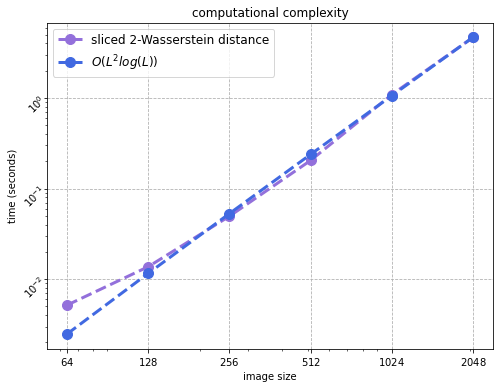

In [6]:
plt.figure(figsize=(8,6))

plt.loglog(Ls, sw_times, linestyle='--', marker='o', ms=10, linewidth=3, color='mediumpurple', label='sliced 2-Wasserstein distance')
# plt.errorbar(Ls, sw_times, yerr=sw_err, color='r')
plt.loglog(Ls, complexity_times, linestyle='--', marker='o', ms=10, linewidth=3, color='royalblue', label='$O(L^2 log(L))$')

plt.tick_params(axis='y', labelrotation=45, pad=-5)
plt.xticks(Ls, labels=[r'$64$', r'$128$', r'$256$', r'$512$', r'$1024$', r'$2048$'])

plt.xlabel('image size')
plt.ylabel('time (seconds)')
plt.title('computational complexity')

plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(axis='both', linestyle='--')
plt.legend()
plt.show()

In [7]:
np.random.seed(0)

n_replicates = 3

Ls = np.array([2**n for n in range(6, 12)])  # size of images

timing_signed_sw = {}
timing_l2 = {}


for L in Ls:
    
    n_points = L
    angles = np.linspace(0, 360, L, endpoint=False)
    
    timing = []
    
    for _ in range(n_replicates):
    
        imgs = np.random.normal(0, 1, (2, L, L))
        
        ts = time.time()
        U_p, U_n = transforms.Transform(imgs, apply_ramp=True, angles=angles, n_points=n_points).signed_inverse_cdf_transform()
        dist = distances.signed_rotational_distances(U_p[0], U_p[1], U_n[0], U_n[1])
        tf = time.time()
        
        timing.append(tf - ts)
        
    timing = np.array(timing)
    t_u = np.mean(timing)
    t_s = np.std(timing)
    
    timing_signed_sw[L] = [t_u, t_s]
    
    
    
for L in Ls:
    
    n_points = L
    angles = np.linspace(0, 360, L, endpoint=False)
    
    timing = []
    
    for _ in range(n_replicates):
    
        imgs = np.random.normal(0, 1, (2, L, L))    
    
        ts = time.time()
        U = transforms.Transform(imgs, apply_ramp=True, angles=angles, n_points=n_points).polar_nufft()
        dist = distances.rotational_distances(U[0], U[1])
        tf = time.time()
        
        timing.append(tf - ts)
            
    timing = np.array(timing)
    t_u = np.mean(timing)
    t_s = np.std(timing)
    
    timing_l2[L] = [t_u, t_s]

In [8]:
sw_times = [v[0] for k, v in timing_signed_sw.items()]
l2_times = [v[0] for k, v in timing_l2.items()]

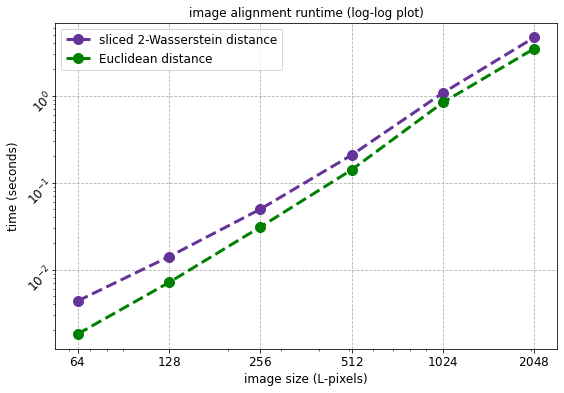

In [20]:
plt.figure(figsize=(9,6))

plt.loglog(Ls, sw_times, linestyle='--', marker='o', ms=10, linewidth=3, color='rebeccapurple', label='sliced 2-Wasserstein distance')
plt.loglog(Ls, l2_times, linestyle='--', marker='o', ms=10, linewidth=3, color='green', label='Euclidean distance')

plt.tick_params(axis='y', labelrotation=45, pad=-5)
plt.xticks(Ls, labels=[r'$64$', r'$128$', r'$256$', r'$512$', r'$1024$', r'$2048$'])

plt.xlabel('image size (L-pixels)')
plt.ylabel('time (seconds)')
plt.title('image alignment runtime (log-log plot)')

plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.grid(axis='both', linestyle='--')
plt.legend()
# plt.savefig('/home/ev9102/ImageAlignment/FastAlignOT/Output/sw_runtime_plot.pdf')
plt.show()